<a href="https://colab.research.google.com/github/restrepo/Activities-2018-2/blob/master/exams/examen_2018_2_03_1036785977.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy.integrate as integrate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


De las ecuaciones (1) y (2) hacemos los siguientes reemplazos:
$$\frac{\operatorname{d} L}{\operatorname{d} t} = V_R$$ donde $V_R$ hace referencia a la velocidad de la masa en la direccion radial y 
$$\frac{\operatorname{d} \theta}{\operatorname{d} t} = V_A$$ donde $V_A$ hace referencia a la velocidad angular de la masa. 

Tomamos la constante del resorte k con una valor de $k=1 N/m$ , la masa como $m=1 Kg$ y la longitud del resorte L0 como $L_0=5 m$ siendo estas las generales, y se pueden cambiar segun lo que le pidan en el ejercicio.

In [0]:
k=1 # N/m
m=1 # Kg
L0=5 # m

In [0]:
def dU_dt(U, t):
    '''
    Here U is a vector such that L=U[0], V_R=U[1], θ=U[2] and V_A=U[3]. 
    This function should return [L', V_R', θ', V_A']
    '''    
    L,V_R,θ,V_A=U 
    k=1 # N/m
    m=1 # Kg
    L0=1 # m
    g=9.8 #m/s^2
    return [V_R, (L0+L)*(V_A**2)-(k/m)*L+g*np.cos(θ), V_A, (-1/(L0+L))*(g*np.sin(θ)+2*V_R*V_A) ]

U0 = [1,0,0.3,0 ] # Condiciones iniciales
ts= np.linspace(0, 40, 1000)
Us = integrate.odeint(dU_dt, U0, ts)
Ls = Us[:,0]
V_Rs = Us[:,1]
θs = Us[:,2]
V_As = Us[:,3]

In [0]:
x = (L0+Ls)*np.sin(θs)
y = -(L0+Ls)*np.cos(θs)

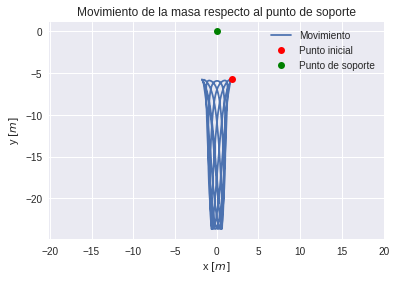

In [0]:
#Grafica de x vs y donde los ejes tienen la misma proporcion
plt.plot(x,y,label="Movimiento")
plt.plot(x[0],y[0],"ro",label="Punto inicial")
plt.plot(0,0,"go",label="Punto de soporte")
plt.xlabel("x $[m]$")
plt.ylabel("y $[m]$")
plt.title("Movimiento de la masa respecto al punto de soporte")
plt.axis("equal")
plt.legend()


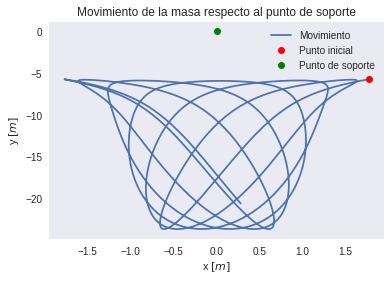

In [0]:
#Grafica de x vs y donde los ejes tienen diferente proporcion y se aprecia mejor el movimiento
plt.plot(x,y,label="Movimiento")
plt.plot(x[0],y[0],"ro",label="Punto inicial")
plt.plot(0,0,"go",label="Punto de soporte")
plt.xlabel("x $[m]$")
plt.ylabel("y $[m]$")
plt.title("Movimiento de la masa respecto al punto de soporte")
plt.legend()
plt.grid()

Espacio de configuraciones

In [0]:
tmax = 50
Nic = 1000
#Variacion de todas las condiciones iniciales
theta0s = np.random.uniform(-4*np.pi,4*np.pi,Nic)
omega0s = np.random.uniform(-8,8,Nic)
radial0s = np.random.uniform(-8,8,Nic)
elongacion0s = np.random.uniform(0,3,Nic)

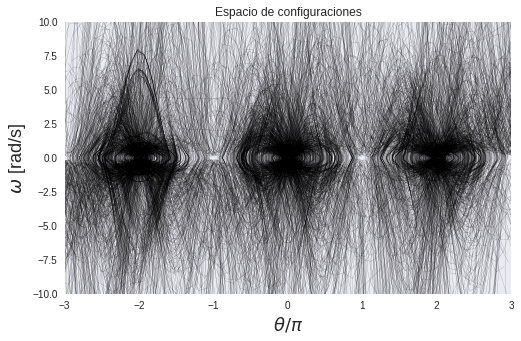

In [0]:
j=0
plt.figure( figsize = (8,5) )
for i in range(0,Nic):
    t=np.linspace(0,tmax,1000)
    U0 = [elongacion0s[i],radial0s[i],theta0s[i],omega0s[i] ]
    Us = integrate.odeint(dU_dt,U0,ts)
    plt.plot(Us[:,2]/np.pi,Us[:,3],lw = 0.1, color = "black" )
    if j==Nic:
        break
    j=j+1
    
#Format of figure
plt.xlabel( "$\\theta/\pi$", fontsize = 18 )
plt.ylabel( "$\omega$ [rad/s]", fontsize = 18 )
plt.xlim( (-3, 3) )
plt.ylim( (-10, 10) )
plt.title( "Espacio de configuraciones" )
plt.grid() 